### Lab | Random variable distributions

[github-lab](https://github.com/ironhack-labs/lab-random-variable-distributions)


Instructions
1. Get the numerical variables from our dataset.
2. Check using a distribution plot if the variables fit the theoretical normal or exponential distribution.
3. Check if any of the transformations (log-transform, etc.) we have seen up to this point changes the result.

In [1]:
import pandas as pd
import numpy as np
import datetime
import warnings
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv("we_fn_use_c_marketing_customer_value_analysis.csv")

In [3]:
df_num = df._get_numeric_data()

In [4]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer Lifetime Value        9134 non-null   float64
 1   Income                         9134 non-null   int64  
 2   Monthly Premium Auto           9134 non-null   int64  
 3   Months Since Last Claim        9134 non-null   int64  
 4   Months Since Policy Inception  9134 non-null   int64  
 5   Number of Open Complaints      9134 non-null   int64  
 6   Number of Policies             9134 non-null   int64  
 7   Total Claim Amount             9134 non-null   float64
dtypes: float64(2), int64(6)
memory usage: 571.0 KB


array([[<AxesSubplot:title={'center':'Customer Lifetime Value'}>,
        <AxesSubplot:title={'center':'Income'}>,
        <AxesSubplot:title={'center':'Monthly Premium Auto'}>,
        <AxesSubplot:title={'center':'Months Since Last Claim'}>],
       [<AxesSubplot:title={'center':'Months Since Policy Inception'}>,
        <AxesSubplot:title={'center':'Number of Open Complaints'}>,
        <AxesSubplot:title={'center':'Number of Policies'}>,
        <AxesSubplot:title={'center':'Total Claim Amount'}>]],
      dtype=object)

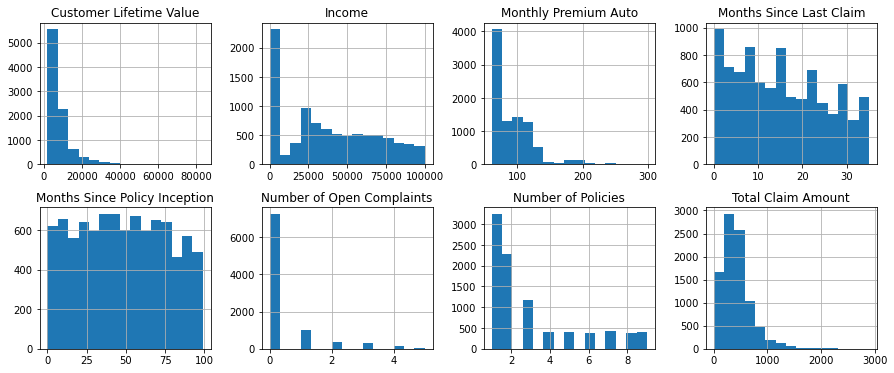

In [5]:
df_num.hist(bins=15, figsize=(15, 6), layout=(2, 4))

/Users/kilo/opt/anaconda3/envs/excondables/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


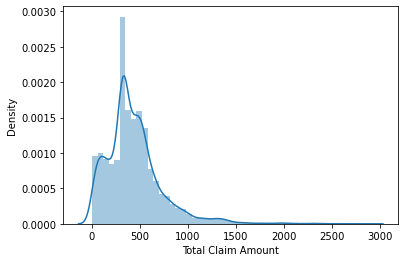

In [6]:
sns.distplot(df_num['Total Claim Amount'])
plt.show()

In [7]:
np.isfinite(df_num)

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...
9129,True,True,True,True,True,True,True,True
9130,True,True,True,True,True,True,True,True
9131,True,True,True,True,True,True,True,True
9132,True,True,True,True,True,True,True,True


In [8]:
np.log(df_num)

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,7.924260,10.937988,4.234107,3.465736,1.609438,-inf,0.000000,5.952753
1,8.850738,-inf,4.543295,2.564949,3.737670,-inf,2.079442,7.031268
2,9.464008,10.794809,4.682131,2.890372,3.637586,-inf,0.693147,6.339428
3,8.941920,-inf,4.663439,2.890372,4.174387,-inf,1.945910,6.272653
4,7.942253,10.688211,4.290459,2.484907,3.784190,-inf,0.000000,4.928202
...,...,...,...,...,...,...,...,...
9129,10.060747,11.183602,4.290459,2.890372,4.488636,-inf,0.693147,5.289452
9130,8.038031,9.980634,4.369448,2.639057,3.332205,-inf,0.000000,5.938064
9131,9.007476,-inf,4.442651,2.197225,3.610918,1.098612,0.693147,6.673026
9132,8.925912,9.996112,4.564348,3.526361,1.098612,-inf,1.098612,6.538429


In [9]:
def log_transfom_clean_(x):
    x = np.log(x)
    if np.isfinite(x):
        return x
    else:
        return np.NAN #  we can replace NANs with mean values in the next step   
df_num['Total Claim Amount'] = list(map(log_transfom_clean_, df_num['Total Claim Amount']))

In [10]:
df_num['Total Claim Amount'] = df_num['Total Claim Amount'].fillna(np.mean(df_num['Total Claim Amount']))

/Users/kilo/opt/anaconda3/envs/excondables/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


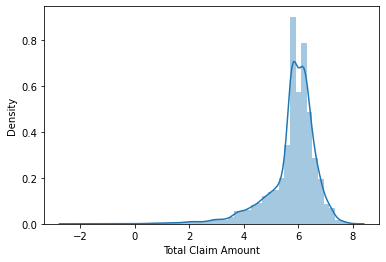

In [11]:
sns.distplot(df_num['Total Claim Amount'])
plt.show()